### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#### Reading in the data

In [2]:
df = pd.read_csv('bitcoin.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2010-07-18,0.0,0.1,0.1,0.1,75,USD
1,2010-07-19,0.1,0.1,0.1,0.1,574,USD
2,2010-07-20,0.1,0.1,0.1,0.1,262,USD
3,2010-07-21,0.1,0.1,0.1,0.1,575,USD
4,2010-07-22,0.1,0.1,0.1,0.1,2160,USD


#### Data Preprocessing

In [4]:
df.isnull().any()

Date        False
Open        False
High        False
Low         False
Close       False
Volume      False
Currency    False
dtype: bool

In [13]:
# convert 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4420 non-null   object 
 1   Open      4420 non-null   float64
 2   High      4420 non-null   float64
 3   Low       4420 non-null   float64
 4   Close     4420 non-null   float64
 5   Volume    4420 non-null   int64  
 6   Currency  4420 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 241.8+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,4420.000000,4420.000000,4420.000000,4420.000000,4.420000e+03
mean,8302.221855,8531.971380,8043.473869,8306.969457,1.395788e+07
std,14598.398937,14992.605971,14146.499234,14599.046649,1.645973e+08
min,0.000000,0.100000,0.000000,0.100000,0.000000e+00
25%,122.500000,129.975000,118.300000,122.800000,3.013600e+04
50%,683.600000,706.500000,657.550000,685.000000,6.762050e+04
75%,8877.250000,9122.700000,8666.900000,8886.075000,1.769402e+05
max,67528.700000,68990.600000,66334.900000,67527.900000,4.468697e+09


###  Feature Engineering

In [7]:
# proposed target variable is the difference betwwen the 'open' and 'close' columns

df['Difference'] = df['Open'] - df['Close']

# Look at first 5 entries.
df['Difference'].head()

0   -0.1
1    0.0
2    0.0
3    0.0
4    0.0
Name: Difference, dtype: float64

In [8]:
# 'Currency' column is dropped because it does not add any information to the dataset.

df= df.drop('Currency', axis=1)

In [9]:
df.corr()

,Open,High,Low,Close,Volume,Difference
Open,1.000000,0.999589,0.999221,0.998996,0.182761,0.021419
High,0.999589,1.000000,0.999158,0.999556,0.182589,-0.000251
Low,0.999221,0.999158,1.000000,0.999468,0.183437,-0.006492
Close,0.998996,0.999556,0.999468,1.000000,0.182242,-0.023398
Volume,0.182761,0.182589,0.183437,0.182242,1.000000,0.011404
Difference,0.021419,-0.000251,-0.006492,-0.023398,0.011404,1.000000


In [10]:
# 'Difference' column is dropped due to it's negative correlation

df= df.drop('Difference', axis=1)

###  Data Visualization

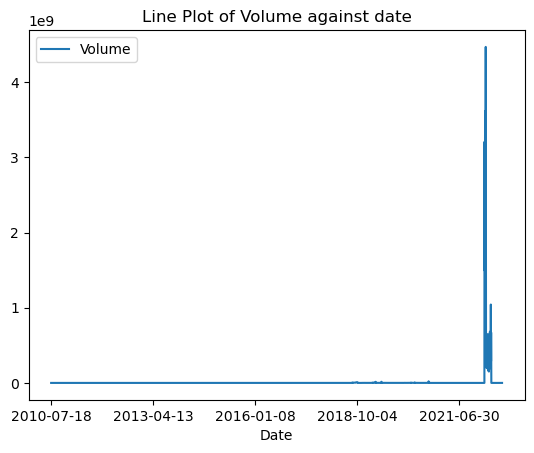

In [11]:
df.plot.line(x="Date", y="Volume", title="Line Plot of Volume against date")

plt.show()

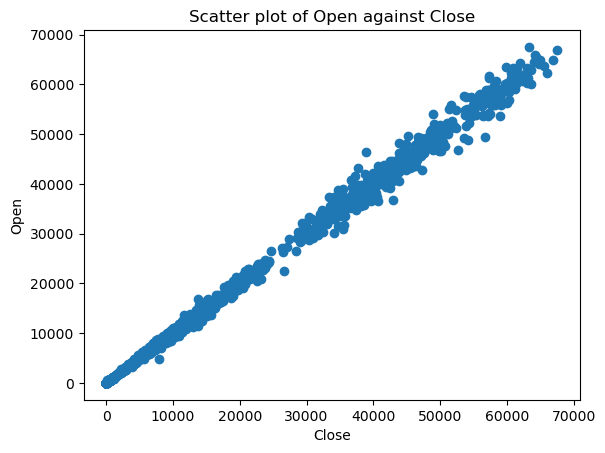

In [12]:
plt.scatter(df['Open'], df['Close'])
plt.ylabel("Open")
plt.xlabel("Close")
plt.title('Scatter plot of Open against Close')
plt.show()

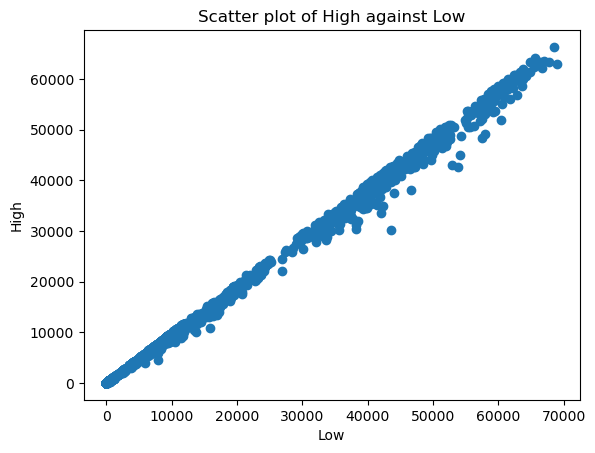

In [13]:
plt.scatter(df['High'], df['Low'])
plt.ylabel("High")
plt.xlabel("Low")
plt.title('Scatter plot of High against Low')
plt.show()

#### Train test Split

In [27]:
from sklearn.model_selection import train_test_split

In [14]:
y = df['Volume']
X = df.drop('Volume', axis=1)

In [13]:
#X=X.drop('Date', axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#### Fitting and evaluating the model

In [15]:
# Import the random forest module
from sklearn.ensemble import RandomForestRegressor

In [16]:
# Declare the model object
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [17]:
y_pred = rf.predict(X_train)

In [18]:
y_pred

array([1.80560439e+05, 2.01568959e+04, 3.90433752e+08, ...,
       2.00548801e+04, 5.59915050e+04, 5.48373064e+04])

#### Model Evaluation and testing

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred)))

RMSE: 80193253.351115


In [21]:
y_predT = rf.predict(X_test)

In [22]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_predT)))

RMSE: 166720764.1812196


#### Hyper Parameter Tuning 

In [23]:
from sklearn.model_selection import GridSearchCV


In [24]:
# Define the grid of hyperparameters to search

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}


In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring= 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)


In [27]:
sorted(sklearn.metrics.SCORERS.keys())

NameError: name 'sklearn' is not defined